In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

/Users/saajan/Desktop/learning_langgraph/.venv/lib/python3.14/site-packages/langchain_core/_api/deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [2]:
class AgentState(TypedDict):
    message : str
    name : str

def greeting_node(state: AgentState) -> AgentState:
    """Simple node to welcome the user"""

    state["message"] = "Hey welcome " + state["name"]

    return state

def compliment_node(state: AgentState) -> AgentState:
    """Simple node to compliment the user"""

    state["message"] = "You are doing great " + state["name"]

    return state 

graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)
graph.add_node("compliment", compliment_node)

graph.add_edge("greeter", "compliment")

graph.set_entry_point("greeter")
graph.set_finish_point("compliment")

app = graph.compile()

In [4]:
result = app.invoke({"name":"bob"})

In [5]:
result["message"]

'You are doing great bob'

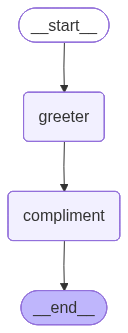

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))